### import dataset

In [7]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("tobennao/rym-top-5000")

df = pd.read_csv(path + "/rym_clean1.csv")
df.head()

,Unnamed: 0,position,release_name,artist_name,release_date,release_type,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count
0,1,1,OK Computer,Radiohead,1997-06-16,album,"Alternative Rock, Art Rock",NaN,"melancholic, anxious, futuristic, malevocals, ...",4.24,74027,1541
1,2,2,Kid A,Radiohead,2000-10-03,album,"Art Rock, Experimental Rock, Electronic","Ambient, Electronic, IDM","cold, melancholic, futuristic, anxious, atmosp...",4.23,61658,751
2,3,3,The Dark Side of the Moon,Pink Floyd,1973-03-23,album,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi...",4.21,60192,1557
3,4,4,Loveless,My Bloody Valentine,1991-11-11,album,"Shoegaze, Noise Pop","Dream Pop, Neo-Psychedelia","noisy, ethereal, atmospheric, romantic, love, ...",4.24,53174,1264
4,5,5,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,album,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist...",4.09,52149,638


### Top 20 genres of highest rated albums of all time
Currently, there are multiple values in the primary_genres column. We will split these values into separate rows.

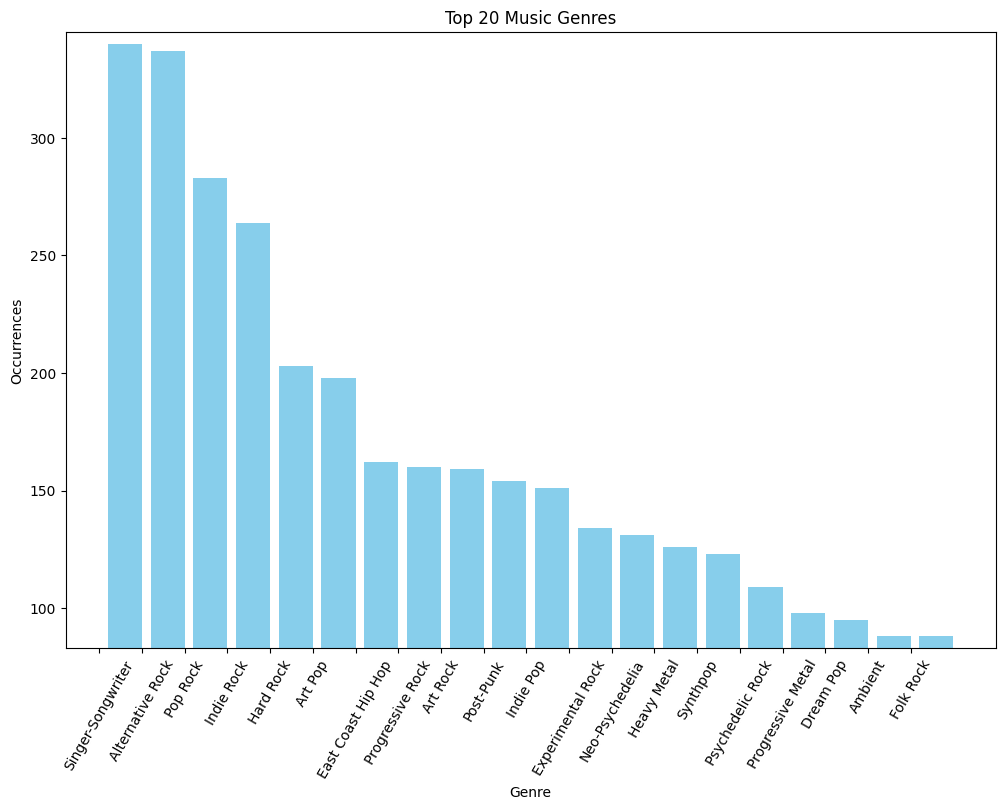

In [8]:
df_genres_only_exploded = df['primary_genres'].str.split(',').explode()
df_genres_only_exploded = df_genres_only_exploded.str.strip()

genre_counts = df_genres_only_exploded.value_counts().head(20)
lowest_genre_occurrences = genre_counts.min()

plt.figure(figsize=(12, 8))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Occurrences')
plt.title('Top 20 Music Genres')
plt.xticks(rotation=60)
plt.ylim(lowest_genre_occurrences - 5, genre_counts.max() + 5)

xticks = plt.gca().get_xticks()
xlabels = plt.gca().get_xticklabels()

new_xticks = [tick - 0.6 for tick in xticks]

plt.gca().set_xticks(new_xticks)
plt.gca().set_xticklabels(xlabels)

plt.show()

### Number of albums per year up to 2020
Because the dataset contains information as of 3/11/22, we will filter out recent albums that may not be well-established with general score.

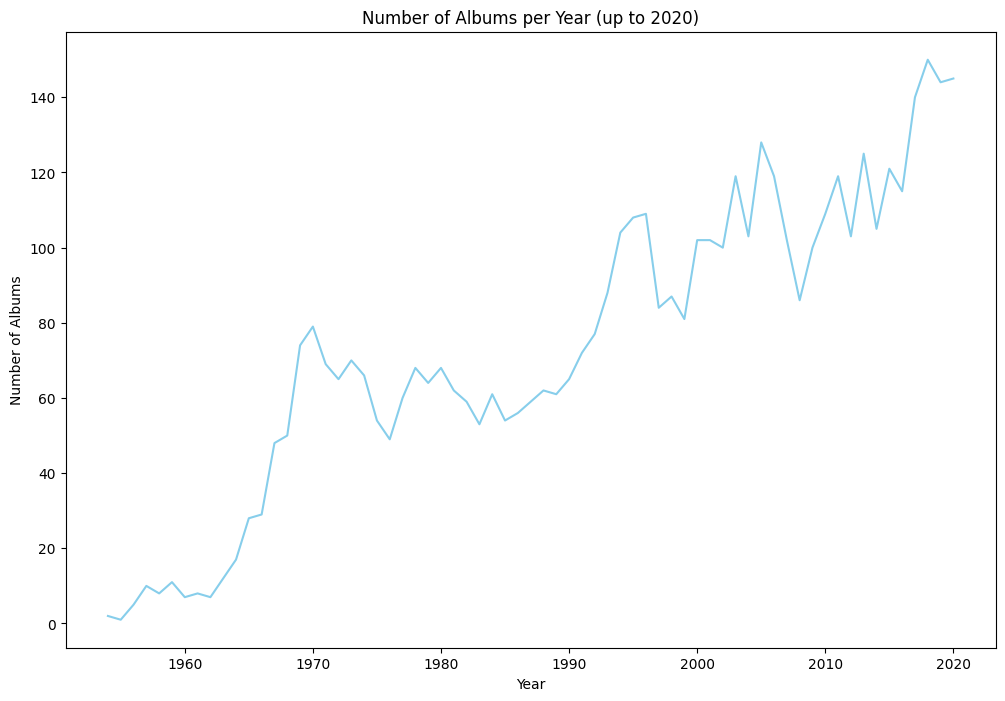

In [9]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
df_filtered = df[df['release_year'] <= 2020]
year_counts = df_filtered['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.plot(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Albums')
plt.title('Number of Albums per Year (up to 2020)')
plt.show()

Based on the graph, we can see that the number of albums from per year from top 5000 of all time has been increasing over time. 

### Top 20 artists with the most albums

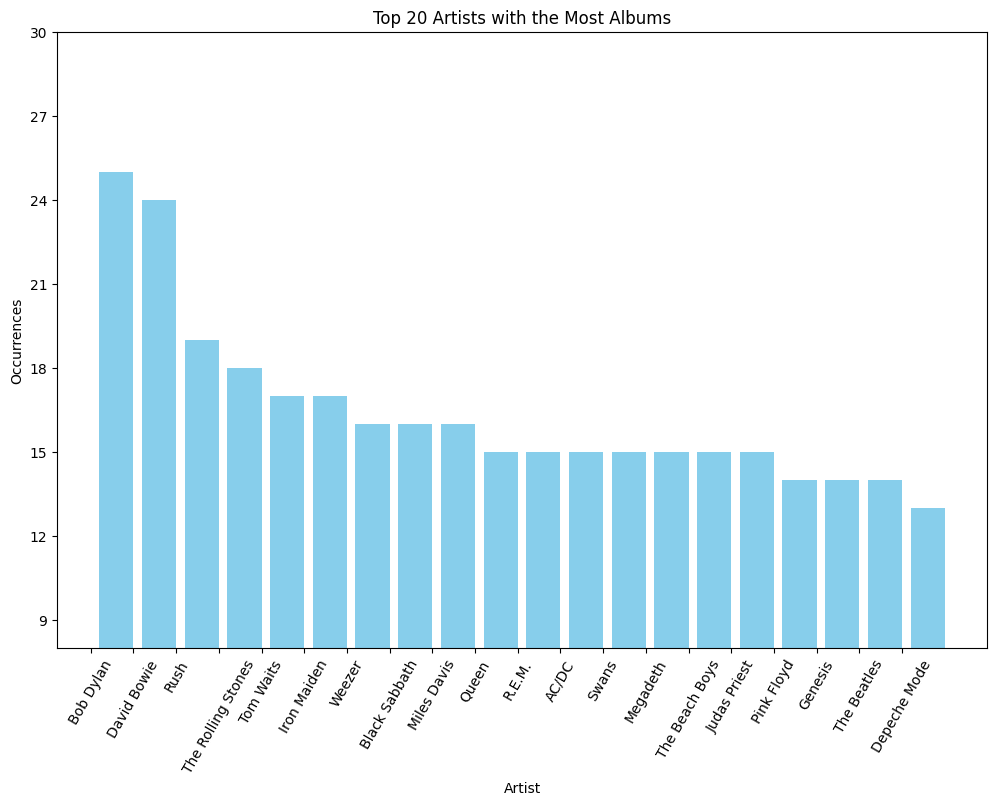

In [10]:
from matplotlib.ticker import MaxNLocator

artist_counts = df['artist_name'].value_counts().head(20)
lowest_artist_occurrences = artist_counts.min()

plt.figure(figsize=(12, 8))
plt.bar(artist_counts.index, artist_counts.values, color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Occurrences')
plt.title('Top 20 Artists with the Most Albums')
plt.xticks(rotation=60)
plt.ylim(lowest_artist_occurrences - 5, artist_counts.max() + 5)

xticks = plt.gca().get_xticks()
xlabels = plt.gca().get_xticklabels()

new_xticks = [tick - 0.6 for tick in xticks]

plt.gca().set_xticks(new_xticks)
plt.gca().set_xticklabels(xlabels)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

### Top genres by decade

<Figure size 1200x800 with 0 Axes>

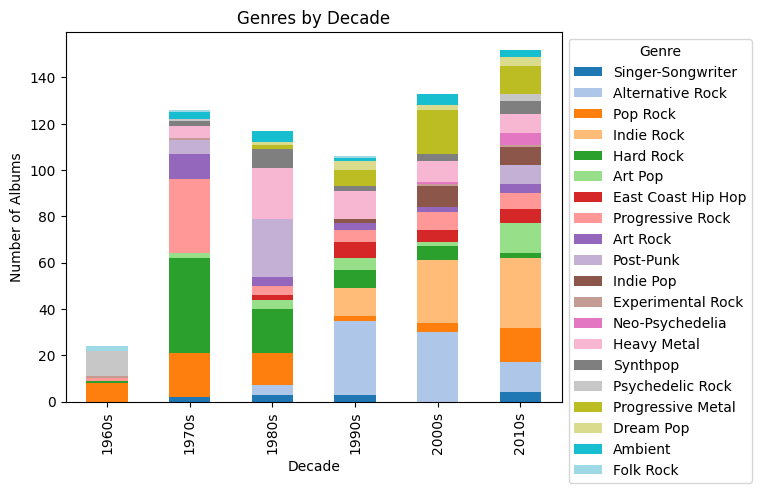

In [11]:
df_decade_filtered = df[(df['release_year'] >= 1960) & (df['release_year'] < 2020)].copy()
df_decade_filtered.loc[:, 'decade'] = ((df_decade_filtered['release_year'] // 10) * 10).astype(str) + 's'
genre_decade = df_decade_filtered.groupby(['decade', 'primary_genres']).size().unstack().fillna(0)
genre_decade = genre_decade.loc[:, genre_counts.index]

plt.figure(figsize=(12, 8))
genre_decade.plot(kind='bar', stacked=True, color=plt.cm.tab20.colors)
plt.xlabel('Decade')
plt.ylabel('Number of Albums')
plt.title('Genres by Decade')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()